In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import numpy as np
import pandas as pd

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

## getting the columns names of Measurement
#columns = Measurement.__table__.columns
#print(columns)

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = june_temps.all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date', 'June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
decem_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [9]:
# 7. Convert the December temperatures to a list.
decem_temps = decem_temps.all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
decem_temps_df = pd.DataFrame(decem_temps, columns=['date', 'December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
decem_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: A written report for the statistical analysis (Extra Metrics)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

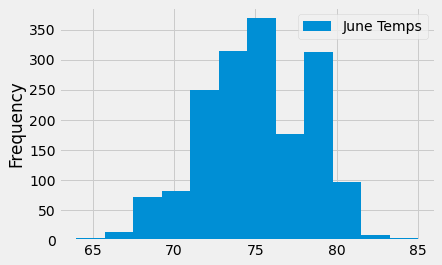

In [19]:
june_temps_df.plot.hist(bins=12)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

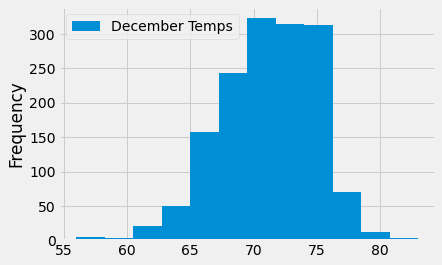

In [20]:
decem_temps_df.plot.hist(bins=12)
plt.tight_layout

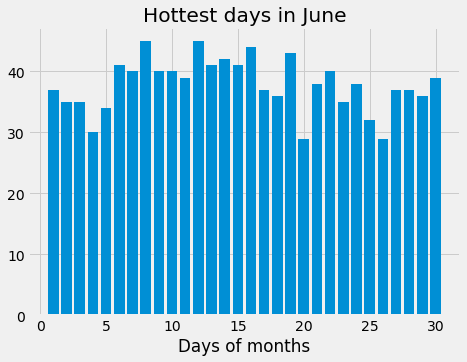

In [13]:
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).filter(Measurement.tobs >= 74).all()

june_temps_higher_74 = pd.DataFrame(june_temps, columns=['date', 'June Temps'])
june_temps_higher_74['date'] = pd.to_datetime(june_temps_higher_74['date'])
june_temps_higher_74['day'] = june_temps_higher_74['date'].dt.day
day_counts = june_temps_higher_74['day'].value_counts()
day_counts = day_counts.sort_index()
# plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(day_counts.keys(),day_counts)
plt.title('Hottest days in June')
plt.xlabel('Days of months')
plt.show()

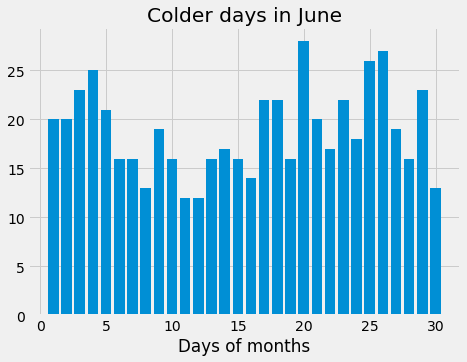

In [14]:
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).filter(Measurement.tobs < 74).all()

june_temps_higher_74 = pd.DataFrame(june_temps, columns=['date', 'June Temps'])
june_temps_higher_74['date'] = pd.to_datetime(june_temps_higher_74['date'])
june_temps_higher_74['day'] = june_temps_higher_74['date'].dt.day
day_counts = june_temps_higher_74['day'].value_counts()
day_counts = day_counts.sort_index()
# plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(day_counts.keys(),day_counts)
plt.title('Colder days in June')
plt.xlabel('Days of months')
plt.show()

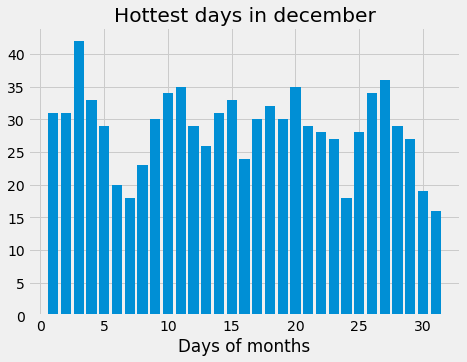

In [15]:
decem_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).filter(Measurement.tobs >= 71).all()

decem_temps_higher_71 = pd.DataFrame(decem_temps, columns=['date', 'December Temps'])
decem_temps_higher_71['date'] = pd.to_datetime(decem_temps_higher_71['date'])
decem_temps_higher_71['day'] = decem_temps_higher_71['date'].dt.day
day_counts = decem_temps_higher_71['day'].value_counts()
day_counts = day_counts.sort_index()
# plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(day_counts.keys(),day_counts)
plt.title('Hottest days in december')
plt.xlabel('Days of months')
plt.show()

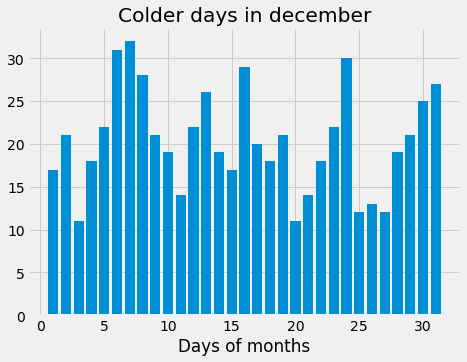

In [16]:
decem_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).filter(Measurement.tobs < 71).all()

decem_temps_higher_71 = pd.DataFrame(decem_temps, columns=['date', 'December Temps'])
decem_temps_higher_71['date'] = pd.to_datetime(decem_temps_higher_71['date'])
decem_temps_higher_71['day'] = decem_temps_higher_71['date'].dt.day
day_counts = decem_temps_higher_71['day'].value_counts()
day_counts = day_counts.sort_index()
# plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(day_counts.keys(),day_counts)
plt.title('Colder days in december')
plt.xlabel('Days of months')
plt.show()

In [17]:
def get_average_for_months(df, year, column = 'temps'):
    out = {}
    for month in range(1,13):
        month = '0' + str(month) if month < 10 else str(month)
        #print(f'date.str.contains("{year}-{month}")')
        data = df.query(f'date.str.contains("{year}-{month}")', engine='python')
        if not data.empty:
            out[month] = data[column].mean()
        else:
            out[month] = 0
    return out
    
def get_year_df(year):
    temps = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('year', Measurement.date)==year).all()
    df = pd.DataFrame(temps, columns=['date','temps', 'precipitation'])
    df.set_index(df['date'], inplace=True)
    # Sort the dataframe by date
    df = df.sort_index()
    return df

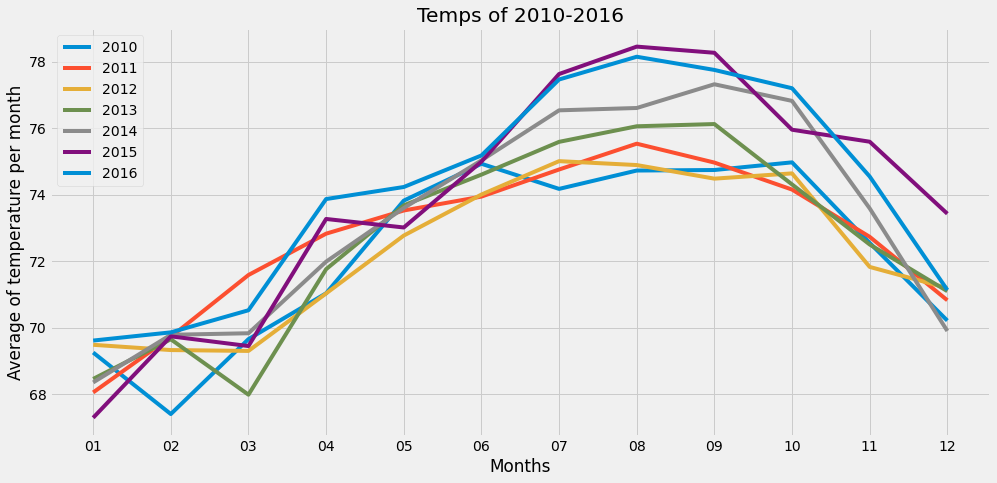

In [18]:
plt.figure(figsize=(15, 7))
for year in range(2010,2017):
    df_temp = get_year_df(year)
    dict_temp = get_average_for_months(df_temp, year)
    plt.plot(dict_temp.keys(), dict_temp.values(), label = str(year))

plt.legend()
plt.title('Temps of 2010-2016')
plt.xlabel('Months')
plt.ylabel('Average of temperature per month')
plt.show()

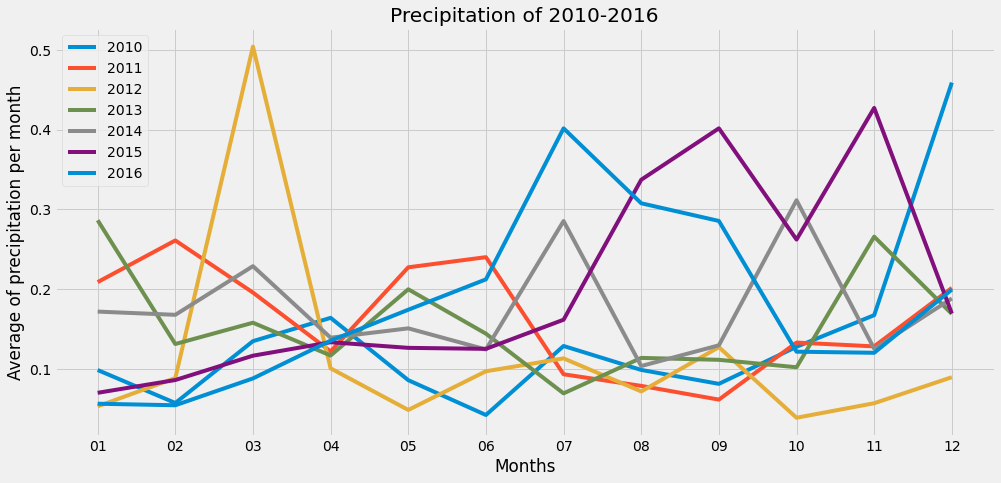

In [21]:
plt.figure(figsize=(15, 7))
for year in range(2010,2017):
    df_temp = get_year_df(year)
    dict_temp = get_average_for_months(df_temp, year, 'precipitation')
    plt.plot(dict_temp.keys(), dict_temp.values(), label = str(year))

plt.legend()
plt.title('Precipitation of 2010-2016')
plt.xlabel('Months')
plt.ylabel('Average of precipitation per month')
plt.show()